### Installing the required packages & libraries

In [760]:
install.packages("quadprog")
install.packages("nortest")
install.packages('lmtest')
install.packages("astsa")
install.packages('tseries')
library(quadprog)
library(nortest)
library(lmtest)
library(astsa)
library(tseries)

Warning message:
"package 'quadprog' is in use and will not be installed"Warning message:
"package 'nortest' is in use and will not be installed"Warning message:
"package 'lmtest' is in use and will not be installed"


  There is a binary version available but the source version is later:
      binary source needs_compilation
astsa   1.12   1.14             FALSE



installing the source package 'astsa'

Warning message:
"package 'tseries' is in use and will not be installed"

### Making a Function to compute the results of different Normality Tests

In [761]:
normtest<-function(x)
{
 
    ad<-ad.test(x) #Anderson-Darling Test
    cvm<-cvm.test(x) #Cramer Von-Mises Test
    ll<-lillie.test(x) # Lilliefors Test
    df<-data.frame(Method=c(ad$method, cvm$method, ll$method),
    P.Value=c(ad$p.value, cvm$p.value, ll$p.value))
    df
}


### Preliminary Data Reading & Analysis

In [644]:
data=read.csv("ALLDATA.csv")

In [645]:
head(data)

Dates,ASSET_1,ASSET_2,ASSET_3,ASSET_4,ASSET_5,ASSET_6,ASSET_7,ASSET_8,ASSET_9,ASSET_10,ASSET_11
14-03-2016,7777.15,15277.80,6374.15,19535.15,10866.85,2343.00,1843.85,11719.20,2311.40,8581.40,148.90
15-03-2016,7711.10,15326.80,6321.75,19136.45,10730.45,2281.40,1849.75,11325.60,2349.30,8596.29,148.90
16-03-2016,7671.70,15461.70,6382.55,19336.80,10803.20,2283.25,1832.30,11381.75,2348.95,8690.54,148.00
17-03-2016,7662.60,15444.00,6364.20,19445.20,10923.50,2293.80,1831.55,11227.40,2356.50,8694.54,146.60
18-03-2016,7767.10,15654.85,6450.85,19555.30,11159.70,2310.15,1877.90,11092.25,2408.80,8803.75,149.35
21-03-2016,7867.60,15926.10,6565.75,19928.45,11193.85,2319.25,1885.05,11235.70,2473.55,8939.04,152.30


In [646]:
tail(data)

,Dates,ASSET_1,ASSET_2,ASSET_3,ASSET_4,ASSET_5,ASSET_6,ASSET_7,ASSET_8,ASSET_9,ASSET_10,ASSET_11
1142,23-10-2020,8094.60,24478.30,11947.40,29782.20,21523.60,1465.95,2443.00,11503.05,1319.65,13529.85,235.10
1143,26-10-2020,7833.65,24075.45,11827.85,29774.65,21265.70,1425.75,2357.55,11334.20,1304.00,13338.80,230.65
1144,27-10-2020,7930.65,24769.50,12082.10,30163.70,21023.40,1445.65,2359.60,11511.50,1292.00,13755.95,229.00
1145,28-10-2020,7922.75,24232.50,11802.40,29948.10,20810.30,1424.95,2325.40,11325.10,1271.70,13454.70,224.35
1146,29-10-2020,7846.75,24092.00,11710.65,29663.45,20876.95,1398.55,2307.70,11226.00,1264.35,13378.65,223.40
1147,30-10-2020,7750.70,23898.85,11628.60,29444.00,20908.85,1418.35,2342.15,11246.70,1262.75,13256.60,227.65


In [647]:
dim(data)

[1] 1147   12

In [763]:
summary(data)

        Dates         ASSET_1         ASSET_2         ASSET_3     
 01-01-2018:   1   Min.   : 4518   Min.   :15278   Min.   : 6322  
 01-01-2019:   1   1st Qu.: 8033   1st Qu.:20620   1st Qu.: 9077  
 01-01-2020:   1   Median : 9023   Median :24817   Median :10531  
 01-02-2017:   1   Mean   : 9138   Mean   :24316   Mean   :10475  
 01-02-2018:   1   3rd Qu.:10750   3rd Qu.:27331   3rd Qu.:11636  
 01-02-2019:   1   Max.   :12010   Max.   :32444   Max.   :14698  
 (Other)   :1141                                                  
    ASSET_4         ASSET_5         ASSET_6          ASSET_7    
 Min.   :19136   Min.   : 9435   Min.   : 987.2   Min.   :1496  
 1st Qu.:23969   1st Qu.:10810   1st Qu.:1881.5   1st Qu.:2431  
 Median :28342   Median :13505   Median :2554.2   Median :2886  
 Mean   :26968   Mean   :13434   Mean   :2475.6   Mean   :2871  
 3rd Qu.:30002   3rd Qu.:15532   3rd Qu.:3031.4   3rd Qu.:3339  
 Max.   :32912   Max.   :22493   Max.   :3642.7   Max.   :4196  
         

### Plotting the time series of the assets to visualise the trends and seasonalities

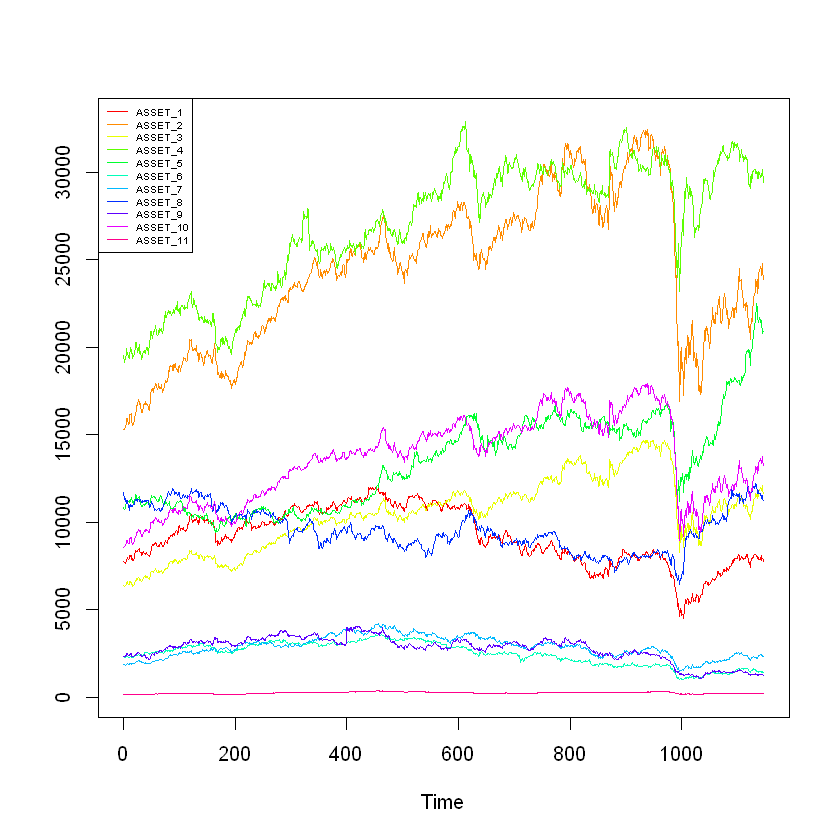

In [766]:
ts.plot(ts(data$ASSET_1),ts(data$ASSET_2),ts(data$ASSET_3),ts(data$ASSET_4),ts(data$ASSET_5),ts(data$ASSET_6),
        ts(data$ASSET_7),ts(data$ASSET_8),ts(data$ASSET_9),ts(data$ASSET_10),ts(data$ASSET_11),
        gpars=list(col=rainbow(11)))
legend("topleft", legend = names(data)[2:12], col = rainbow(11), lty = 1, cex=0.5)

###  Inferences
#### 1. Asset 2 & Asset 4 are high value assets and seems to have high rise than rest of the assets.
#### 2. There seems to be a significant drop around 1000th Day in prices of all the assets that can be attributed to Covid-19.
#### 3. Asset 6,9,7,11 are low value assets in comaprison to other assets.
#### 3. Asset 11 seems to be a low value stock whose price is almost constant (Pink color one at the bottom). 


# Assignment - PART 1

### Q1.	How can you identify Trends in the given Time series data? Please write appropriate code to calculate and visualize the Trends for each of the 11 Assets. 

### Ans: Here, I have used *Polynomial Regression* to estimate the trends of the time series of different assets. 

In [768]:
#Making a copy of data to preserve the original data
df=data 

In [718]:
#Taking only linear feature of the regression model to estimate the trend
t=1:dim(df)[1]

In [769]:
#Testing the regression model on ASSET_1
model=lm(df$ASSET_1~t)
summary(model)


Call:
lm(formula = df$ASSET_1 ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-3396.6  -780.6   -77.5  1027.4  2506.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10775.8032    77.8894  138.35   <2e-16 ***
t              -2.8529     0.1175  -24.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1318 on 1145 degrees of freedom
Multiple R-squared:  0.3397,	Adjusted R-squared:  0.3391 
F-statistic: 589.1 on 1 and 1145 DF,  p-value: < 2.2e-16


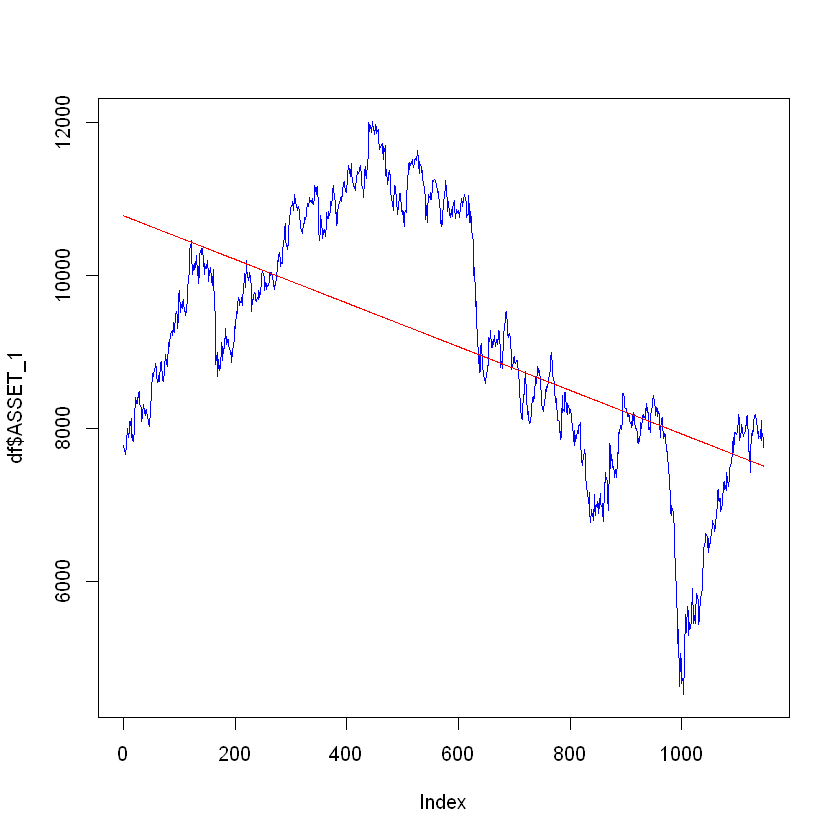

In [771]:
#Plotting the linear regression on the time series of ASSET_1
pred = predict.lm(model)
plot(df$ASSET_1,type='l',col="blue")
lines(pred,col="red")

### Inferences
#### 1. An overall decreasing trend is shown by the linear regression model which is ambiguous since the actual trend is both increasing as well as decreasing.
#### 2. R_Square is only 34%. 
#### 3. We need more complex regression models to estimate the trend. 

In [773]:
#Running the linear regression model for every asset. 
for (i in 2:12)
    {
    model=lm(df[,i]~t)
    cat("Asset-",i-1,"  has R_square",summary(model)$r.squared," and p-value of Global F-test:",
          anova(model)$'Pr(>F)'[1],"\n")
    }

Asset- 1   has R_square 0.3397146  and p-value of Global F-test: 2.526678e-105 
Asset- 2   has R_square 0.3164136  and p-value of Global F-test: 1.098305e-96 
Asset- 3   has R_square 0.6014665  and p-value of Global F-test: 5.60671e-231 
Asset- 4   has R_square 0.7454601  and p-value of Global F-test: 0 
Asset- 5   has R_square 0.7347808  and p-value of Global F-test: 0 
Asset- 6   has R_square 0.5577964  and p-value of Global F-test: 4.146289e-205 
Asset- 7   has R_square 0.0532803  and p-value of Global F-test: 2.451503e-15 
Asset- 8   has R_square 0.2210023  and p-value of Global F-test: 4.012148e-64 
Asset- 9   has R_square 0.4058101  and p-value of Global F-test: 1.380257e-131 
Asset- 10   has R_square 0.2806333  and p-value of Global F-test: 5.642717e-84 
Asset- 11   has R_square 0.0427642  and p-value of Global F-test: 1.521048e-12 


### Inferences 
#### Only Asset 3 and Asset 4 have significant R_square value otherwise the regression model is working poorly for other Assets. 

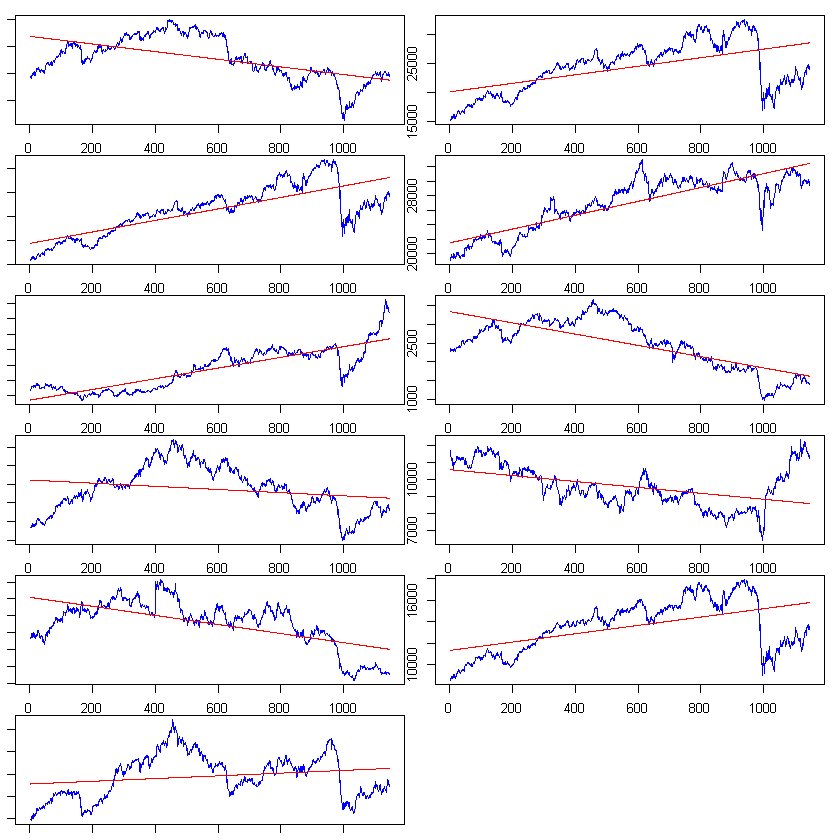

In [781]:
#Plotting all the Assets with the trends shown by linear regression
par(mar=c(1,1,1,1))
par(mfrow=c(6,2))
for (i in 2:12)
    {
    model=lm(df[,i]~t)
    pred = predict.lm(model)
    plot(df[,i],type='l',col="blue")
    lines(pred,col="red")
    }

### Inference
#### The simple linear regression is incompetent in explaining the trends and hence we need higher order terms. 

In [784]:
#Adding more higher degree terms to the regression
t_sq=t^2 #square term
t_cube=t^3 #cubic term
model2=lm(data$ASSET_1~t+t_sqr+t_cube)
summary(model2)


Call:
lm(formula = data$ASSET_1 ~ t + t_sqr + t_cube)

Residuals:
     Min       1Q   Median       3Q      Max 
-2592.12  -473.92    56.44   592.83  1240.62 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.065e+03  8.611e+01   82.05   <2e-16 ***
t            2.545e+01  6.493e-01   39.20   <2e-16 ***
t_sqr       -4.801e-02  1.314e-03  -36.54   <2e-16 ***
t_cube       2.261e-05  7.524e-07   30.05   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 726.7 on 1143 degrees of freedom
Multiple R-squared:  0.7997,	Adjusted R-squared:  0.7991 
F-statistic:  1521 on 3 and 1143 DF,  p-value: < 2.2e-16


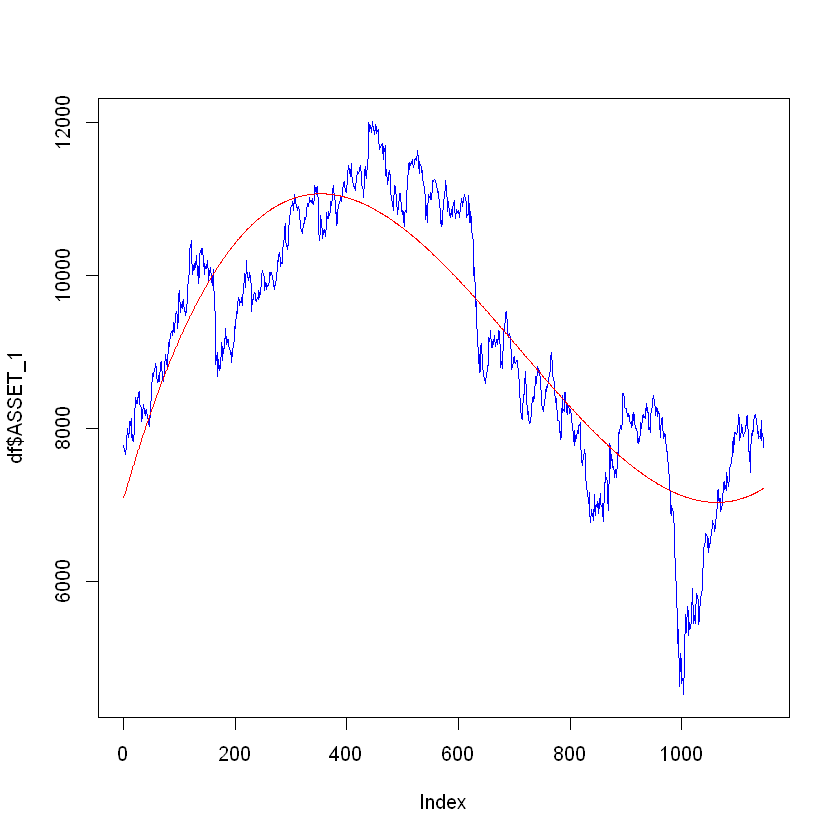

In [785]:
#Plotting the higher order regression on the time series of ASSET_1
pred2 = predict.lm(model2)
plot(df$ASSET_1,type='l',col="blue")
lines(pred2,col="red")

### Inferences
#### 1. The Polynomial Regression is now showing the trend way better than the simple linear regression.
#### 2. R_Square has risen upto 80%. 


In [783]:
#Running the linear regression model for every asset. 
for (i in 2:12)
    {
    mod_l=lm(df[,i]~t+t_sq+t_cube)
    cat("Asset-",i-1,"  has R_square",summary(mod_l)$r.squared," and p-value of Global F-test:",
          anova(model)$'Pr(>F)'[1],"\n")
    }

Asset- 1   has R_square 0.7996665  and p-value of Global F-test: 1.521048e-12 
Asset- 2   has R_square 0.7472396  and p-value of Global F-test: 1.521048e-12 
Asset- 3   has R_square 0.795099  and p-value of Global F-test: 1.521048e-12 
Asset- 4   has R_square 0.8731895  and p-value of Global F-test: 1.521048e-12 
Asset- 5   has R_square 0.7548484  and p-value of Global F-test: 1.521048e-12 
Asset- 6   has R_square 0.9062178  and p-value of Global F-test: 1.521048e-12 
Asset- 7   has R_square 0.8171289  and p-value of Global F-test: 1.521048e-12 
Asset- 8   has R_square 0.6727267  and p-value of Global F-test: 1.521048e-12 
Asset- 9   has R_square 0.8224965  and p-value of Global F-test: 1.521048e-12 
Asset- 10   has R_square 0.75474  and p-value of Global F-test: 1.521048e-12 
Asset- 11   has R_square 0.4915957  and p-value of Global F-test: 1.521048e-12 


### Inferences
#### All the assets except ASSET_11 have high r_square value and hence most of the trend is explained . 

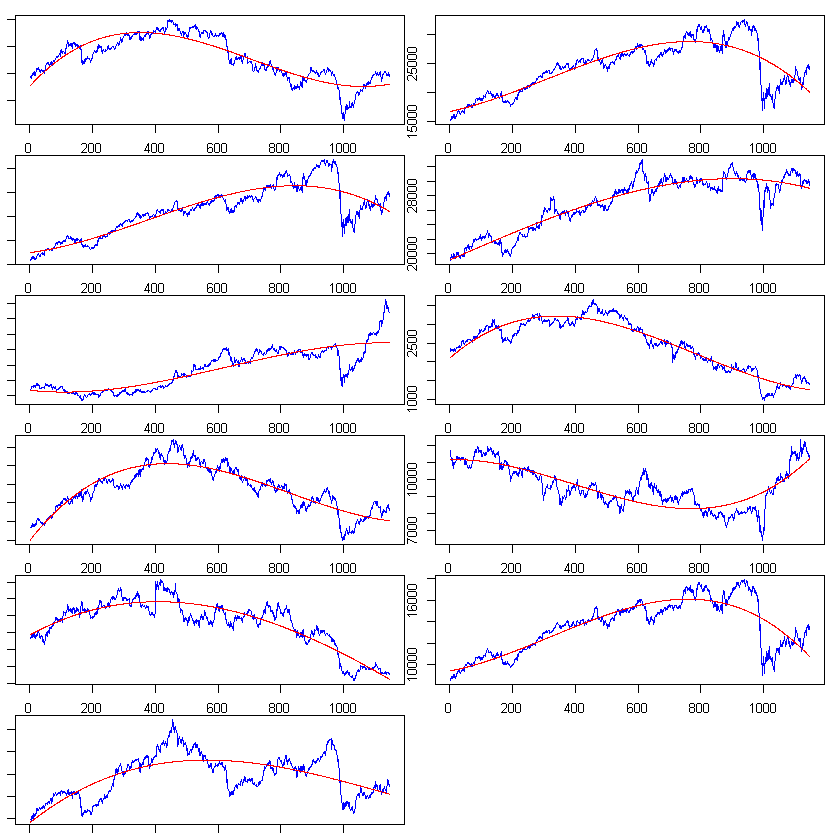

In [782]:
#Plotting all the Assets with the trends shown by polynomial regression
par(mar=c(1,1,1,1))
par(mfrow=c(6,2))
for (i in 2:12)
    {
    mod_el=lm(df[,i]~t+t_sq+t_cube)
    pred = predict.lm(mod_el)
    plot(df[,i],type='l',col="blue")
    lines(pred,col="red")
    }

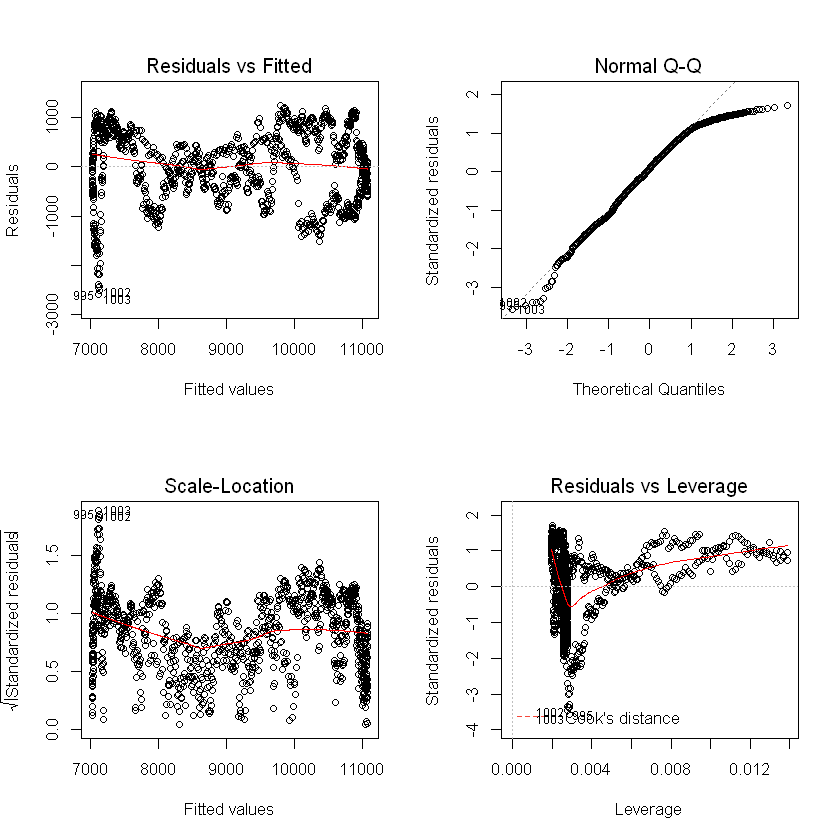

In [786]:
#Residual Analysis for the Polynomial Method
par(mfrow=c(2,2))
plot(model2) #model2 is the model for Asset_1

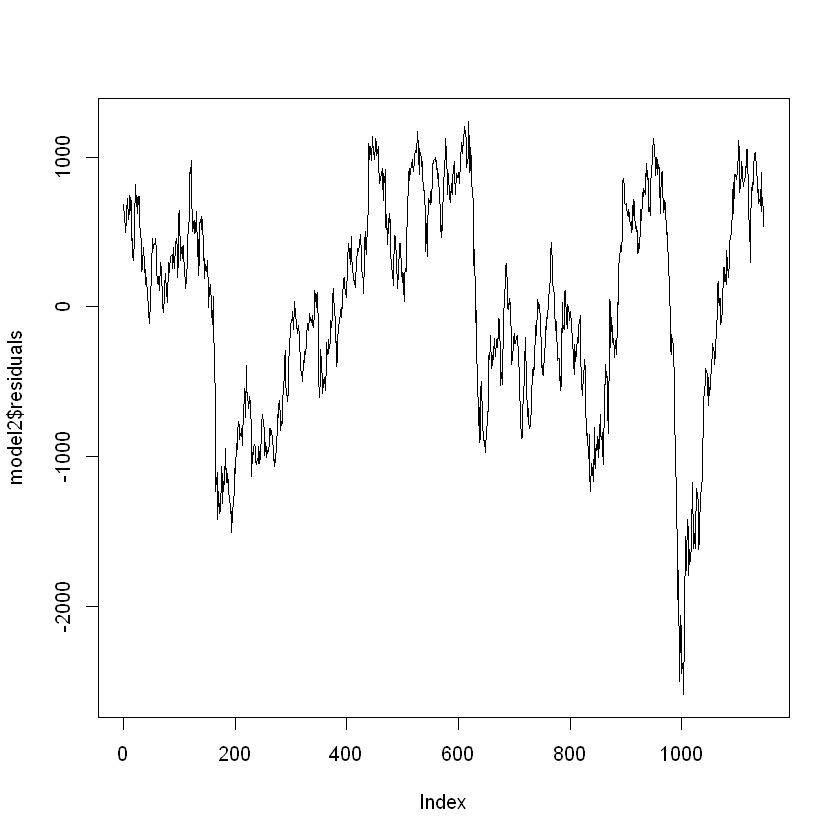

In [791]:
plot(model2$residuals,type='l')#Plotting the residuals

In [790]:
#Performing Normality Test on Residuals
#Null Hypo: Residuals are Normal
#Alterantive Hypo: Converse of Null
normtest(model2$residuals) 

Warning message in cvm.test(x):
"p-value is smaller than 7.37e-10, cannot be computed more accurately"

Method,P.Value
Anderson-Darling normality test,2.273040e-20
Cramer-von Mises normality test,7.370000e-10
Lilliefors (Kolmogorov-Smirnov) normality test,2.401889e-08


In [792]:
#Breusch-Pagan test for homoskedasticity
#Null Hypo: Residuals are homoskedastic
#Alterantive Hypo: Converse of Null
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 66.799, df = 3, p-value = 2.067e-14


### Residual Analysis
#### 1. The Residual Plot is not anywhere near to normal. 
#### 2. The Residuals are heteroskedastic(via BP test)
#### 2. The normality tests also fails miserably on this. 
#### 3. Hence, the polynomial regression is not able to explain the time series sufficiently.

### Q2.	In any approach you’ve chosen to take in the previous question (there are many), what do you think are the shortcomings of the approach?

### Ans. The Demerits of Using Regression for the approach are:
###          1. The assumption of IID Xs for the Linear regression model is compromised.
###          2. The residuals still have patterns left indicating the residuals are not pure noise.
###          3. Residuals fails Normality & Homoskedasticity tests.


### Q3.	Given the set of 11 assets, plot the Efficient Frontier, assuming a Risk Free Rate of 0%.

In [793]:
df_R <- data.frame() #making a dataframe for storing daily returns of the assets

In [794]:
for(i in 1:11) #for all the assets
    { 
    for(j in 2:dim(df)[1]) #going in all the rows for each asset
    {
        # daily_return=(today's_return-yesterday's_return)/yesterday's_return
        # making columns simultaneously for each asset namely R1, R2
        df_R[j,paste("R",as.character(i), sep ="")]=(df[j,i+1]-df[j-1,i+1])/df[j-1,i+1] 
    } 
    }

In [795]:
head(df_R)

R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-0.008492828,0.003207268,-0.008220704,-0.020409365,-0.012551935,-0.0262910798,0.0031998265,-0.033585910,0.0163969888,0.0017351481,0.000000000
-0.005109517,0.008801576,0.009617590,0.010469549,0.006779772,0.0008109056,-0.0094337073,0.004957795,-0.0001489805,0.0109640322,-0.006044325
-0.001186178,-0.001144764,-0.002875026,0.005605891,0.011135589,0.0046206066,-0.0004093216,-0.013561183,0.0032142021,0.0004602706,-0.009459459
0.013637669,0.013652551,0.013615223,0.005662066,0.021623106,0.0071279100,0.0253064344,-0.012037515,0.0221939317,0.0125607565,0.018758527
0.012939192,0.017326899,0.017811606,0.019081783,0.003060118,0.0039391382,0.0038074445,0.012932453,0.0268806045,0.0153673151,0.019752260


In [796]:
#deleting the first row since its NA
df_R = df_R[-1,]

In [382]:
#initializing an array for storing annualized returns
returns=array()

In [801]:
#Calculating returns using the formula, 
#(final_stock_price/initial_stock_price_fours_years_ago)^(stock_days_in_a_year/total_market_days)

for (i in 2:12) #for each asset
    {
    returns[i-1]=((df[1147,i]/df[1,i])^(252/1147))-1
    }

In [802]:
#Output
returns

-0.0007482029
0.1032957875
0.1412104383
0.0943261968
0.1546372718
-0.1044144767
0.0539616545
-0.0090008778
-0.1243810986
0.1002624571
0.0977599891


In [629]:
#Covariance Matrix
covar=cov(df_R)*252 #(annualised risk)^2 for each asset

#### Monte-Carlo Simulation for finding efficient frontier

In [803]:
weights=array() #weightage for each stock
port_returns=array() #contains portfolio returns for different combination of assets
port_risk=array() #contains portfolio risks for different combination of assets
stock_weights=data.frame() #contains weights for different combination of assets
for (i in 1:10000) #for 10000 simulations
    {
        weights=runif(11) #Randomly generating 11 no. between 0 & 1
        weights=array(weights/sum(weights),dim=c(11,1)) #Making sure sum of weights is equal to 1.
        port_returns[i]=t(weights)%*%returns #Computing returns by w1*r1+w2*r2+.......w11*r11
        port_risk[i]=sqrt(t(weights)%*%(covar%*%(weights))) #Computing risk by w_transpose*Dispersion*w & taking square root
        stock_weights=rbind(stock_weights,t(weights)) #collecting the weights for each combination
    }

In [804]:
dim(stock_weights)

[1] 10000    11

In [805]:
sum(weights)

[1] 1

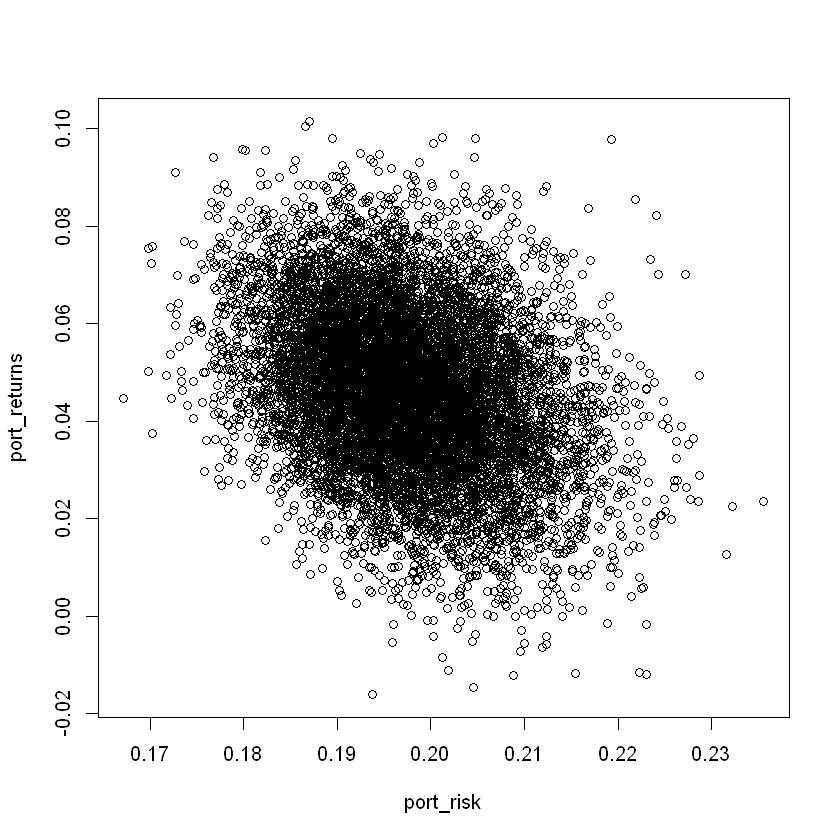

In [806]:
plot(port_risk, port_returns)

In [810]:
# Finding the point which has minimum risk. 

for (i in 1:length(port_risk))
    {
    if (port_risk[i]==min(port_risk))
    {
        
        break
    }
}
print(port_returns[i]) #portfolio_return corresponding to minimum variance portfolio
print(min(port_risk)) #minimum portfolio_risk 
print(stock_weights[i,]) #weights of the 11 assets corresponding to minimum variance portfolio


[1] 0.0445732
[1] 0.1672072
             V1         V2         V3        V4        V5        V6          V7
5979 0.07098461 0.01811641 0.07684364 0.2074318 0.1656032 0.1127415 0.005354155
            V8         V9        V10        V11
5979 0.2224812 0.05254019 0.04451188 0.02339141


### Solving the Constrained Quadratic Optimization Problem to locate the Efficient Frontier
#### Objective Func: Minimize wT∑w
#### Constraints: 
#### 1. ∑Wi=1 i.e. sum of weights must be 1
####                      2. Wi>=0 i.e all weights must be greater than 0
####                       3. wTr>=r i.e portfolio return must be greater than some return
#### Using quadprog library for the same. 

In [825]:
flag=0
port_ret=array()
port_ri=array()
asset_weights=data.frame()
for (i in 1:1000) #running optimization problem 1000 times and changing minimum returns each time
    {
    Amat=t(matrix(c(1,1,0,0,0,0,0,0,0,0,0,0,returns[1],   #contraints matrix
                    1,0,1,0,0,0,0,0,0,0,0,0,returns[2],
                    1,0,0,1,0,0,0,0,0,0,0,0,returns[3],
                    1,0,0,0,1,0,0,0,0,0,0,0,returns[4],
                    1,0,0,0,0,1,0,0,0,0,0,0,returns[5],
                    1,0,0,0,0,0,1,0,0,0,0,0,returns[6],
                    1,0,0,0,0,0,0,1,0,0,0,0,returns[7],
                    1,0,0,0,0,0,0,0,1,0,0,0,returns[8],
                    1,0,0,0,0,0,0,0,0,1,0,0,returns[9],
                    1,0,0,0,0,0,0,0,0,0,1,0,returns[10],
                    1,0,0,0,0,0,0,0,0,0,0,1,returns[11]), 13, 11)) 
    dvec=c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
    flag=i/6500 #this represents the minimum return
    bvec=c(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, flag) #right side of the contraints
    qp=solve.QP(covar, dvec, Amat, bvec, meq = 1) #solving
    w=array(qp$solution,dim=c(11,1)) #computing the optimum weights
    returns=array(returns,dim=c(11,1)) 
    port_ret[i]=t(w)%*%returns #computing the optimum portfolio returns
    port_ri[i]=sqrt(t(w)%*%covar%*%w) #computing the optimum portfolio risk
    asset_weights=rbind(asset_weights,t(w))
   }

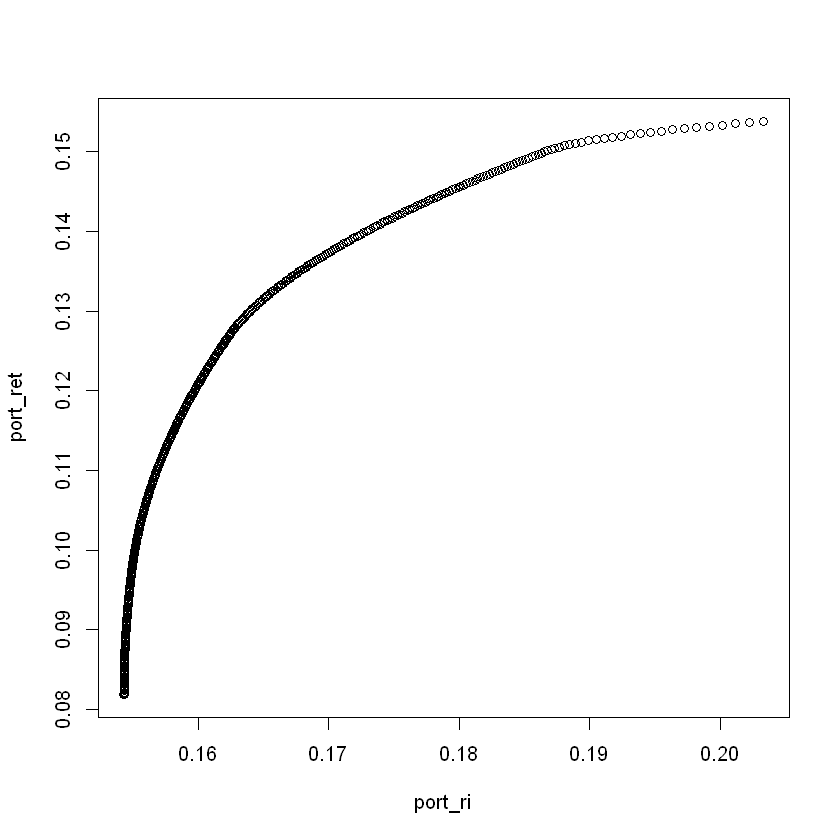

In [826]:
#Plotting the effcient frontier 
plot(port_ri, port_ret)

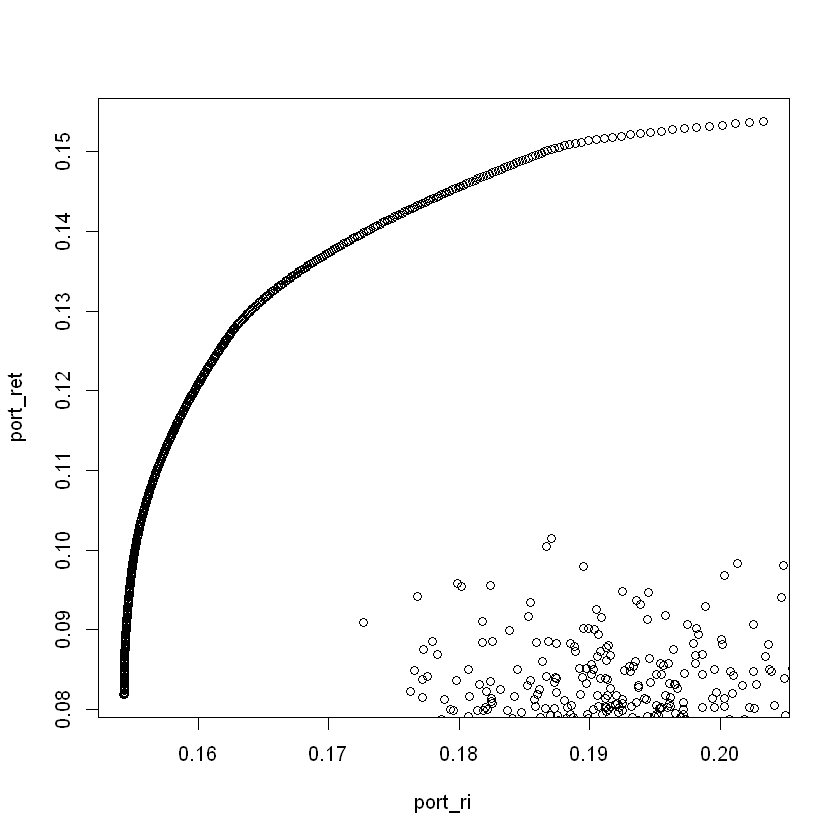

In [827]:
#Plotting the efficient frontier along with the Monte-Carlo Simulations.
plot(port_ri, port_ret)
points(port_risk, port_returns)

### Inference
#### The Monte-Carlo Simulations seems to be far off from the efficient frontier plot. 

### Q4. For the same 11 assets, identify the following portfolios:
### a.	Minimum Variance Portfolio
### b.	Tangency Portfolio

In [838]:
#finding the minimum variance portfolio
c=0
for (i in 1:length(port_ri))
    {
    if (port_ri[i]==min(port_ri))
    {
        c=i
        break
    }
}
print(port_ret[c]) #portfolio_return corresponding to minimum variance portfolio
print(min(port_ri)) #portfolio_risk corresponding to minimum variance portfolio
print(asset_weights[c,]) #weights corresponding to minimum variance portfolio

[1] 0.08183501
[1] 0.1542929
            V1            V2         V3        V4        V5         V6
1 2.030977e-18 -8.908934e-18 0.01569709 0.4395878 0.2907188 0.04733072
            V7        V8 V9          V10         V11
1 4.190009e-18 0.2066656  0 2.139523e-16 3.57231e-18


In [835]:
#finding the tangency portfolio
k=0
r=0
s=0
for (i in 1:length(port_ret))
    {
        slope=port_ret[i]/port_ri[i] #calculating the slope with repect to risk free rate of 0 percent
        if (slope > s) #finding the maximum slope 
        {
            s=slope 
            k=port_ret[i]
            r=port_ri[i]
        }
    }
        
print(k) #portfolio_return corresponding to tangency portfolio
print(r) #portfolio_risk corresponding to tangency portfolio

[1] 0.142
[1] 0.1752335


### Q5. Show the above 2 portfolios on the Efficient Frontier plot.

In [836]:
x=c(0,r)
y=c(0,k)

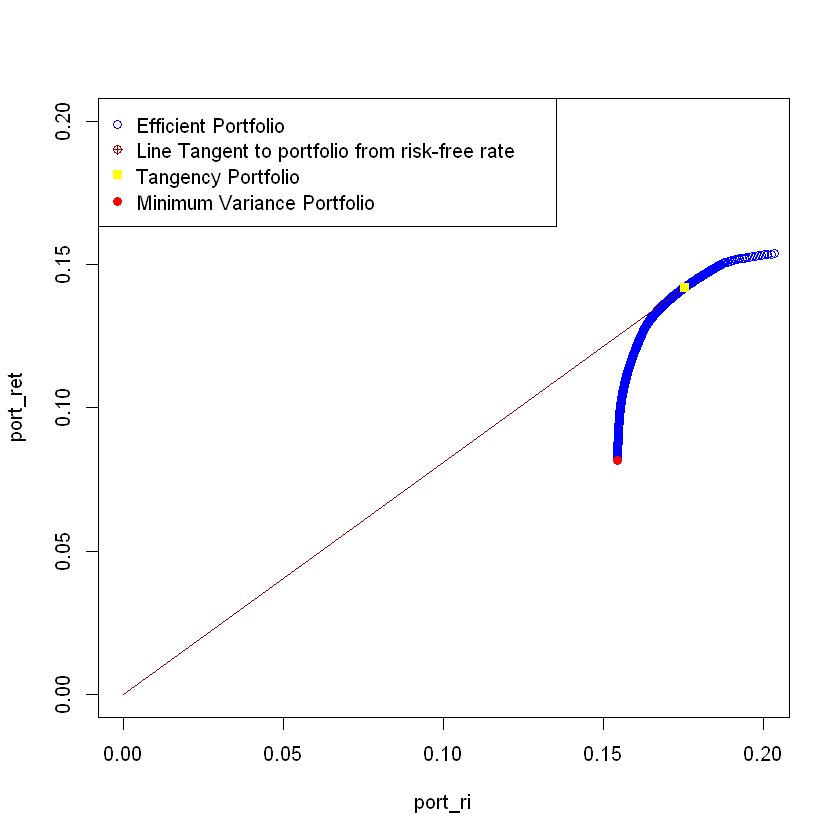

In [839]:
plot(port_ri, port_ret,xlim=c(0,0.2), ylim=c(0,0.2),col='blue')
lines(x,y, col = "dark red", pch='-')
points(r,k,col = "yellow",pch = 15)
points(min(port_ri),port_ret[c],col = "red",pch = 19)
legend("topleft", legend = c('Efficient Portfolio','Line Tangent to portfolio from risk-free rate',
                             'Tangency Portfolio','Minimum Variance Portfolio'), 
                              col=c('blue','dark red','yellow','red') , pch = c(1,10,15,19))
